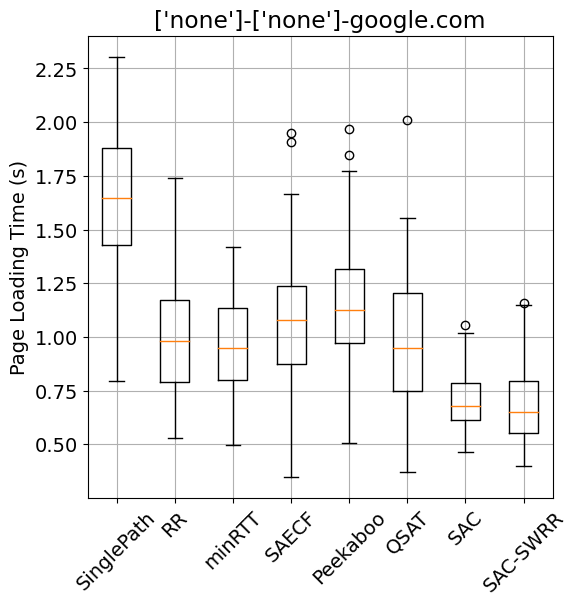

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import itertools

# Set global font size
mpl.rcParams.update({'font.size': 14})  # Increase this value to increase the font size

def read_csv_files(data, base_path, mdlArr, numArr, web, bgrArr, frqArr, bwdArr, owdArr, varArr, losArr, brsArr, schArr, stm):
    for j in range(len(schArr)):
        if schArr[j] == "SAC-SWRR":
            for l in range(len(brsArr)):
                for m in range(len(mdlArr)):
                    file_path = os.path.join(base_path, f'{mdlArr[m]}-{numArr[0]}-{web}-{bgrArr[0]}-{frqArr[0]}-{bwdArr[0]}-{owdArr[0]}-{varArr[0]}-{losArr[0]}-SAC-SWRR-{brsArr[l]}-result.csv')
                    if os.path.exists(file_path):
                        df = pd.read_csv(file_path, header=None)
                        data[schArr[j]] = df[0].values  # As
                    else:
                        print(f"File not found: {file_path}")
        else:
            for l in range(len(brsArr)):
                for m in range(len(mdlArr)):
                    file_path = os.path.join(base_path, f'{mdlArr[m]}-{numArr[0]}-{web}-{bgrArr[0]}-{frqArr[0]}-{bwdArr[0]}-{owdArr[0]}-{varArr[0]}-{losArr[0]}-{schArr[j]}-{stm}-{brsArr[l]}-result.csv')
                    if os.path.exists(file_path):
                        df = pd.read_csv(file_path, header=None)
                        data[schArr[j]] = df[0].values  # As
                    else:
                        print(f"File not found: {file_path}")

def plot_data(level, data, webArr, schArr, mdlArr, brsArr):
    label_mapping = {
        'SinglePath': 'SinglePath',
        'RoundRobin': 'RR',
        'LowLatency': 'minRTT',
        'SAECF': 'SAECF',
        'Peekaboo': 'Peekaboo',
        'QSAT': 'QSAT',
        'SAC': 'SAC',
        'SAC-SWRR': 'SAC-SWRR'
    }

    # Create the box plot
    plt.figure(figsize=(6, 6))
    plt.boxplot(data.values(), labels=[label_mapping.get(label, label) for label in data.keys()])
    plt.ylabel('Page Loading Time (s)')
    plt.xticks(rotation=45)
    plt.title(f'{mdlArr}-{brsArr}-{webArr}')
    plt.grid(True)
    plt.show()

level = "output/result-wireless"
base_path = os.path.join("..", level)
webArr = ["google.com"]

for i, web in enumerate(webArr):
    data = {}
    mdlArr = ["none"]
    numArr = ["1"]
    brsArr = ["safari"]
    bgrArr = ["0"]
    frqArr = ["0"]
    bwdArr = ["50"]
    owdArr = ["15"]
    varArr = ["10"]
    losArr = ["0.5"]
    stmArr = ["WRR", "SWRR"]
    schArr = ["SinglePath", "RoundRobin", "LowLatency", "SAECF", "Peekaboo", "QSAT", "SAC", "SAC-SWRR"]

    read_csv_files(data, base_path, mdlArr, numArr, web, bgrArr, frqArr, bwdArr, owdArr, varArr, losArr, brsArr, schArr, stmArr[0])

    plot_data(level, data, web, schArr, mdlArr, brsArr)
